# Gate License Detector

In [47]:
import cv2 as cv
import skimage.io as io
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.draw import rectangle
import matplotlib.pyplot as plt
import numpy as np
import imutils
import math


In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


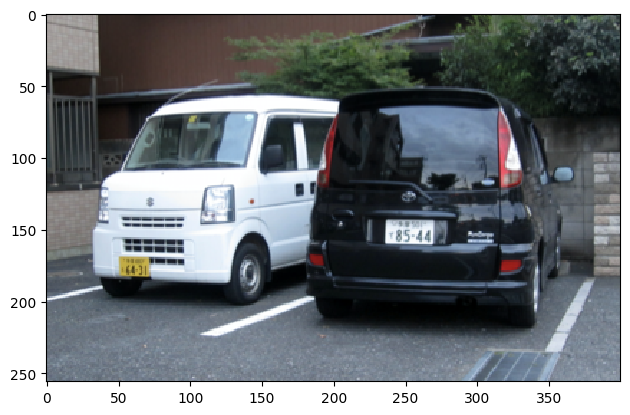

In [49]:
img = io.imread('images/Cars413.png')[...,:3]
io.imshow(img)

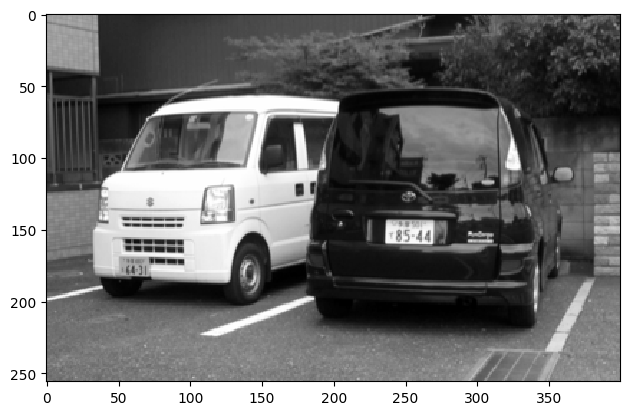

In [50]:
gray =(rgb2gray(img)*255).astype(np.uint8)
io.imshow(gray)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


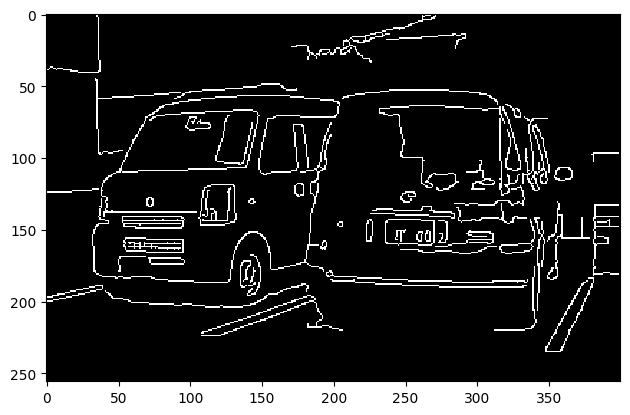

In [51]:
can = canny(gray, sigma=1.0, low_threshold=30, high_threshold=200)
print(can) 
io.imshow(can)

(array([[[182, 196]],

       [[181, 197]],

       [[179, 197]],

       [[178, 198]],

       [[176, 198]],

       [[175, 199]],

       [[173, 199]],

       [[172, 200]],

       [[171, 200]],

       [[170, 201]],

       [[168, 201]],

       [[167, 202]],

       [[165, 202]],

       [[164, 203]],

       [[162, 203]],

       [[161, 204]],

       [[159, 204]],

       [[158, 205]],

       [[156, 205]],

       [[155, 206]],

       [[154, 206]],

       [[153, 207]],

       [[151, 207]],

       [[150, 208]],

       [[148, 208]],

       [[147, 209]],

       [[146, 209]],

       [[145, 210]],

       [[143, 210]],

       [[142, 211]],

       [[140, 211]],

       [[139, 212]],

       [[137, 212]],

       [[136, 213]],

       [[134, 213]],

       [[133, 214]],

       [[131, 214]],

       [[130, 215]],

       [[128, 215]],

       [[127, 216]],

       [[125, 216]],

       [[124, 217]],

       [[122, 217]],

       [[121, 218]],

       [[119, 218]],

       [[

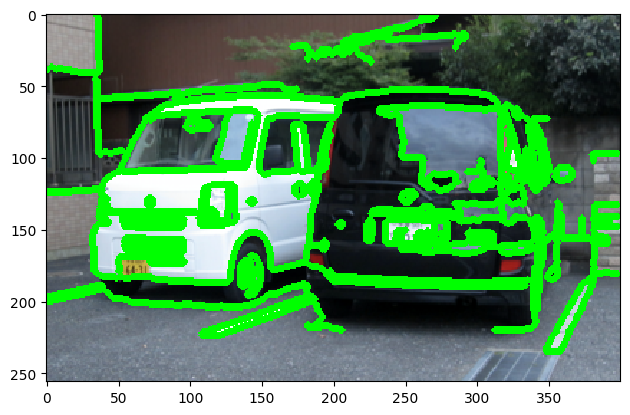

In [57]:
cnts,new = cv.findContours(can.copy().astype(np.uint8), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
image1=img.copy()
cv.drawContours(image1,cnts,-1,(0,255,0),3)
io.imshow(image1)

[array([[[115, 119]],

       [[114, 120]],

       [[112, 120]],

       [[111, 121]],

       [[110, 121]],

       [[110, 122]],

       [[109, 123]],

       [[109, 128]],

       [[108, 129]],

       [[108, 137]],

       [[107, 138]],

       [[107, 141]],

       [[106, 142]],

       [[107, 143]],

       [[107, 147]],

       [[124, 147]],

       [[125, 146]],

       [[127, 146]],

       [[128, 145]],

       [[131, 145]],

       [[131, 144]],

       [[132, 143]],

       [[132, 139]],

       [[131, 138]],

       [[131, 120]],

       [[130, 119]]], dtype=int32), array([[[114, 120]],

       [[115, 119]],

       [[129, 119]],

       [[131, 121]],

       [[131, 138]],

       [[132, 139]],

       [[132, 142]],

       [[131, 143]],

       [[131, 144]],

       [[130, 145]],

       [[128, 145]],

       [[127, 146]],

       [[125, 146]],

       [[124, 147]],

       [[108, 147]],

       [[107, 146]],

       [[107, 143]],

       [[106, 142]],

       [[107, 141

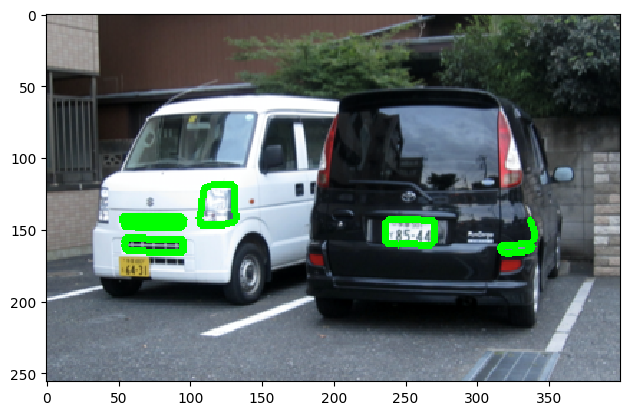

In [58]:
cnts = sorted(cnts, key = cv.contourArea, reverse = True) [:10]
print(cnts)
image1=img.copy()
cv.drawContours(image1,cnts,-1,(0,255,0),3)
io.imshow(image1)

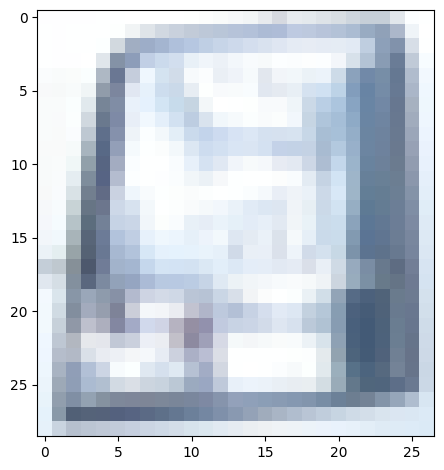

In [54]:
plate = None
for c in cnts:
        perimeter = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
                screenCnt = approx
                x,y,w,h = cv.boundingRect(c) 
                plate=img[y:y+h,x:x+w]
                break
io.imshow(plate)